# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

># Estudiante: Kevin Esquivel Acuña

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [3]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

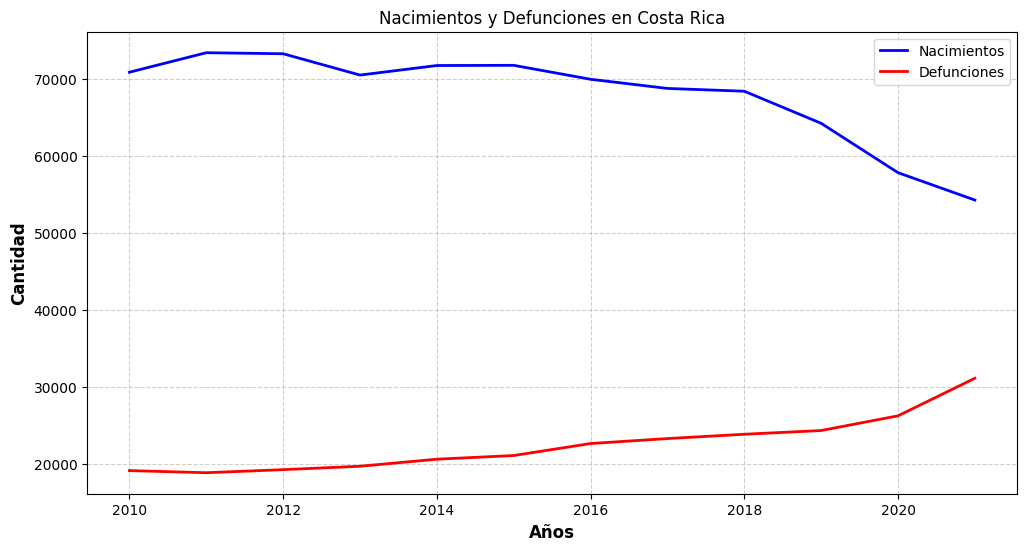

In [4]:
import matplotlib.pyplot as plt

df_filtrado = df[df['Año'] >= 2010]
#df_filtrado = df.loc[df['Año'] >= 2010]

plt.figure(figsize=(12,6))

plt.plot(df_filtrado['Año'], df_filtrado['Nacimientos'], color='blue', lw = 2, label = 'Nacimientos') # Eje X, Eje Y
plt.plot(df_filtrado['Año'], df_filtrado['Defunciones'], color='red', lw = 2, label = 'Defunciones') # Eje X, Eje Y

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.title('Nacimientos y Defunciones en Costa Rica')
plt.xlabel("Años", fontsize=12, fontweight="bold")
plt.ylabel('Cantidad', fontsize=12, fontweight="bold")
plt.legend()

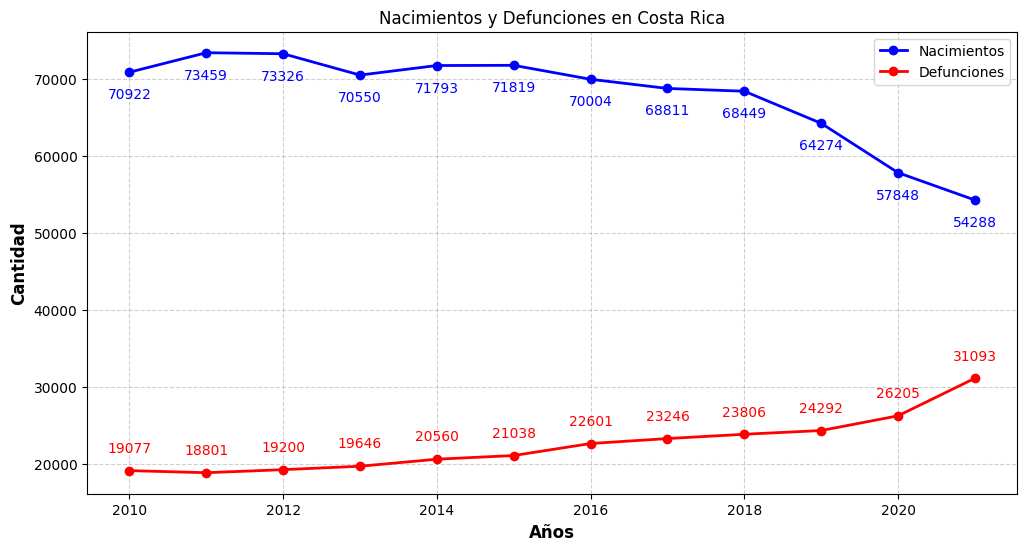

In [5]:
import matplotlib.pyplot as plt

df_filtrado = df[df['Año'] >= 2010]

plt.figure(figsize=(12,6))

# Graficar líneas con marcadores
plt.plot(df_filtrado['Año'], df_filtrado['Nacimientos'], color='blue', lw=2, marker='o', label='Nacimientos') 
plt.plot(df_filtrado['Año'], df_filtrado['Defunciones'], color='red', lw=2, marker='o', label='Defunciones')

# Agregar etiquetas en la parte INFERIOR de las líneas
for x, y in zip(df_filtrado['Año'], df_filtrado['Nacimientos']):
    plt.text(x, y - 2000, str(y), ha='center', va='top', fontsize=10, color='blue')  # va='top' baja la etiqueta

for x, y in zip(df_filtrado['Año'], df_filtrado['Defunciones']):
    plt.text(x, y + 2000, str(y), ha='center', va='bottom', fontsize=10, color='red')  # va='bottom' sube la etiqueta

# Personalizar gráfico
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.title('Nacimientos y Defunciones en Costa Rica')
plt.xlabel("Años", fontsize=12, fontweight="bold")
plt.ylabel('Cantidad', fontsize=12, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [6]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [7]:
# Filtrar datos desde el año 2010
#df_filtrado = df[df['Año']>=2010]
df_filtrado = df.loc[df['Año'] >= 2010] 
df_filtrado

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [8]:
# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
# total_defunciones 
total_defunciones = df['Defunciones'].sum()

print(f'Total de nacimientos: {total_nacimientos}')
print(f'Total de defunciones: {total_defunciones}')

Total de nacimientos: 4846207
Total de defunciones: 975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [9]:
#Saldo Poblacional
df['saldo_poblacional'] = df['Nacimientos'] - df['Defunciones']
df

,Año,Nacimientos,Defunciones,saldo_poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

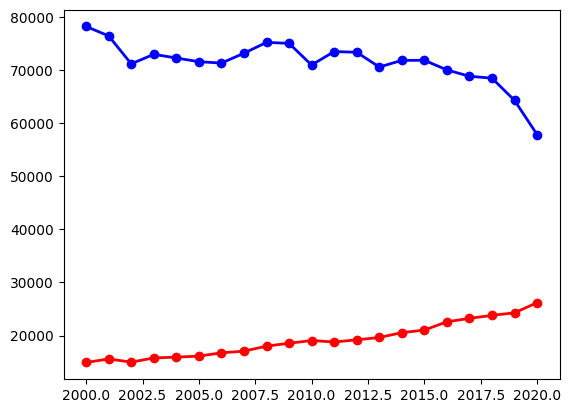

In [10]:
import matplotlib.pyplot as plt

anio_inicial = int(input('Por favor ingrese el año inicial que desea graficar: '))
anio_final = int(input('Por favor ingrese el año final que desea graficar: '))

# Filtrar correctamente usando & y paréntesis
df_rango_anios = df[(df['Año'] >= anio_inicial) & (df['Año'] <= anio_final)]

# Gráfico líneal
plt.plot(df_rango_anios['Año'], df_rango_anios['Nacimientos'], color='blue', lw=2, marker='o', label='Nacimientos') 
plt.plot(df_rango_anios['Año'], df_rango_anios['Defunciones'], color='red', lw=2, marker='o', label='Defunciones')

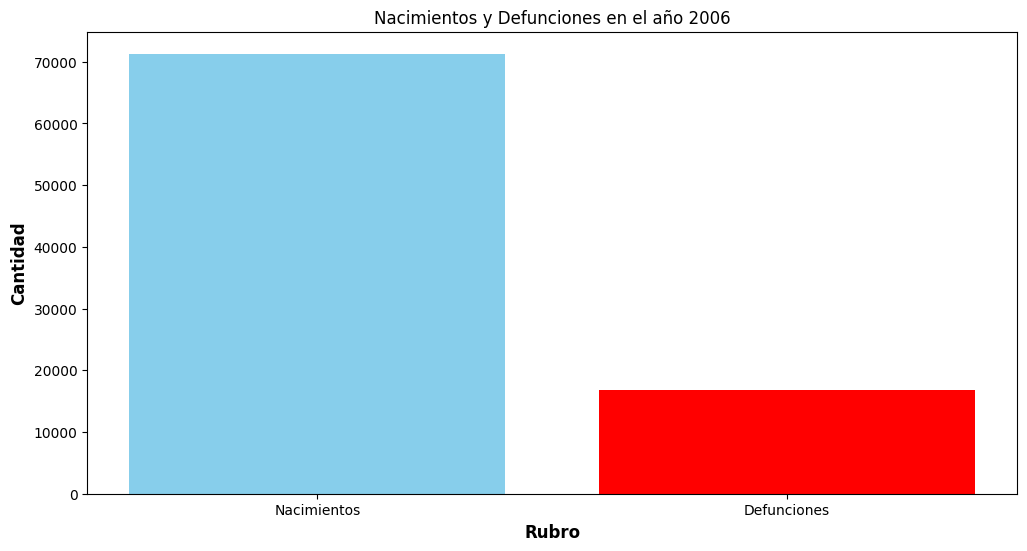

In [11]:
import matplotlib.pyplot as plt

anio_usuario = int(input('Por favor ingrese el año que desea graficar: '))

df_anio_usuario = df[df['Año'] == anio_usuario ]

plt.figure(figsize=(12,6))
plt.bar(['Nacimientos', 'Defunciones'], [df_anio_usuario['Nacimientos'].values[0], df_anio_usuario['Defunciones'].values[0]], color=['skyblue', 'red'])

# Personalizar gráfico
plt.title(f'Nacimientos y Defunciones en el año {df_anio_usuario['Año'].values[0]}')
plt.xlabel('Rubro', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad', fontsize=12, fontweight="bold")

plt.show()

### **Gráfico de barras: Comparación de nacimientos y defunciones**

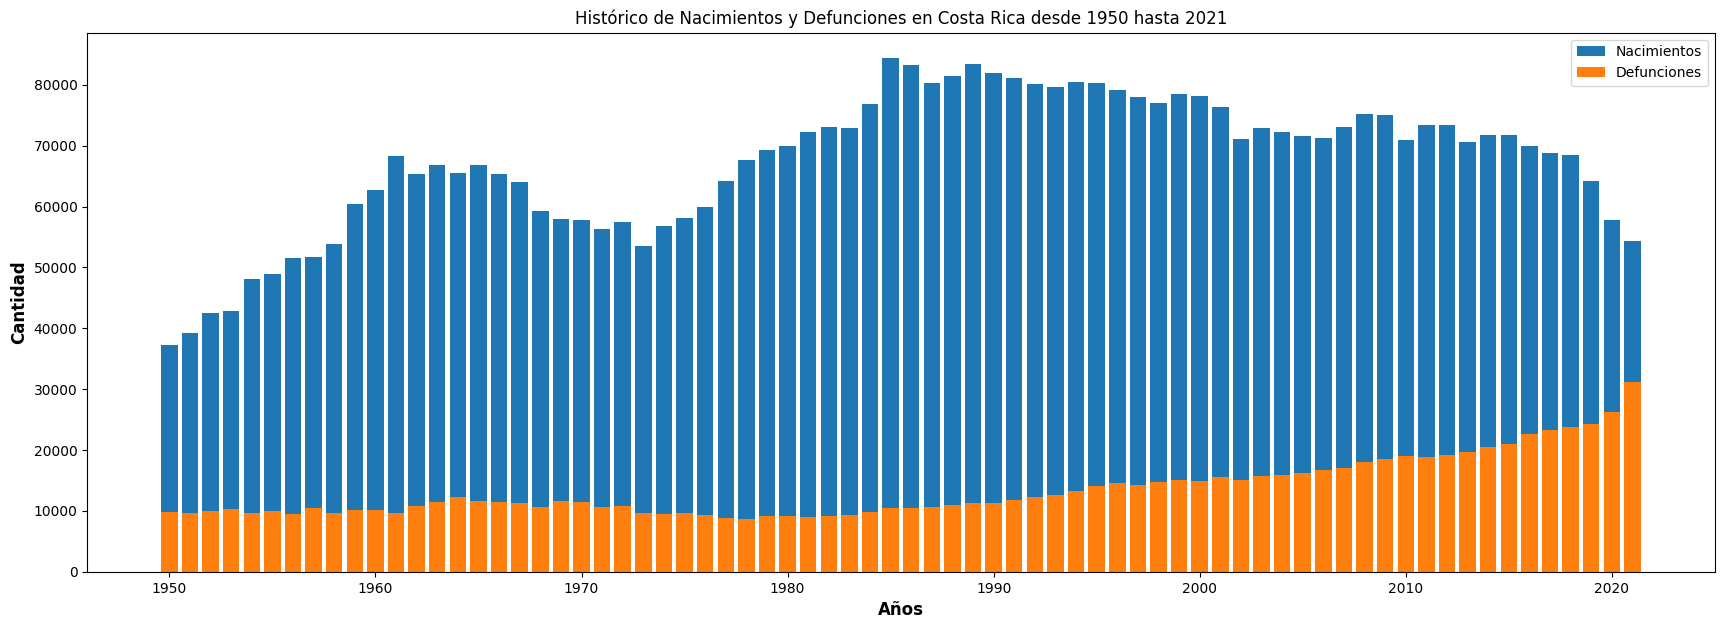

In [12]:
# Crear gráfico de barras

plt.figure(figsize=(21,7))

plt.bar(df['Año'], df['Nacimientos'], label='Nacimientos')
plt.bar(df['Año'], df['Defunciones'], label='Defunciones')
plt.legend()
# Mínimo y máximo de años
anio_min = df['Año'].min()
anio_max = df['Año'].max()
# Personalizar gráfico
plt.title(f'Histórico de Nacimientos y Defunciones en Costa Rica desde {anio_min} hasta {anio_max}')
plt.xlabel('Años', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad', fontsize=12, fontweight="bold")
plt.show()

In [13]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio
# Crear gráfico de barras



,Año,Nacimientos,Defunciones,saldo_poblacional
71,2021,54288,31093,23195


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [22]:
df_filtrado = df[df['Año'] >= 2000]
print(df_filtrado.head())

# Promedio de Defunciones
df_avg_defunciones = df_filtrado.groupby('Año')['Defunciones'].mean()
print('\n\n',df_avg_defunciones.sort_values(ascending=False).head())

# Promedio de Nacimientos
df_avg_nacimientos = df_filtrado.groupby('Año')['Nacimientos'].mean()
print('\n\n',df_avg_nacimientos.sort_values(ascending=True).head())

# Promedio de Defunciones
promedio_defunciones = df_filtrado['Defunciones'].mean()
print(f"\n\nPromedio de Defunciones a partir del año 2000: {promedio_defunciones:.2f}")

# Promedio de Nacimientos
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
print(f"Promedio de Nacimientos a partir del año 2000: {promedio_nacimientos:.2f}")

     Año  Nacimientos  Defunciones  saldo_poblacional
50  2000        78178        14944              63234
51  2001        76401        15609              60792
52  2002        71144        15004              56140
53  2003        72938        15800              57138
54  2004        72247        15949              56298


 Año
2021    31093.0
2020    26205.0
2019    24292.0
2018    23806.0
2017    23246.0
Name: Defunciones, dtype: float64


 Año
2021    54288.0
2020    57848.0
2019    64274.0
2018    68449.0
2017    68811.0
Name: Nacimientos, dtype: float64


Promedio de Defunciones a partir del año 2000: 19701.23
Promedio de Nacimientos a partir del año 2000: 70573.68


3. **Graficar:**

C:\Users\Kevin Esquivel\AppData\Local\Temp\ipykernel_7524\2895932354.py:11: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)


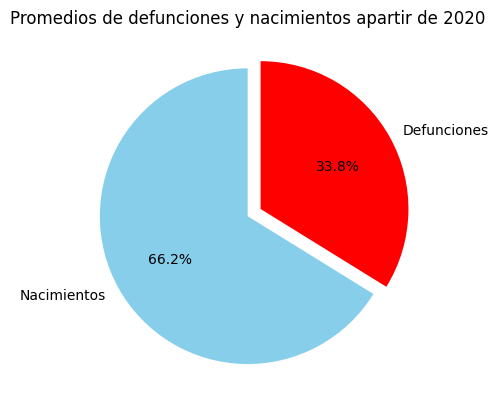

In [16]:
df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()


eje_x = ['Nacimientos','Defunciones'] #Etiquetas
data = [promedio_nacimientos,promedio_defunciones]
color = ['skyblue', 'red']


plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)
plt.title('Promedios de defunciones y nacimientos apartir de 2020')
plt.show()


C:\Users\Kevin Esquivel\AppData\Local\Temp\ipykernel_7524\2163222760.py:17: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)


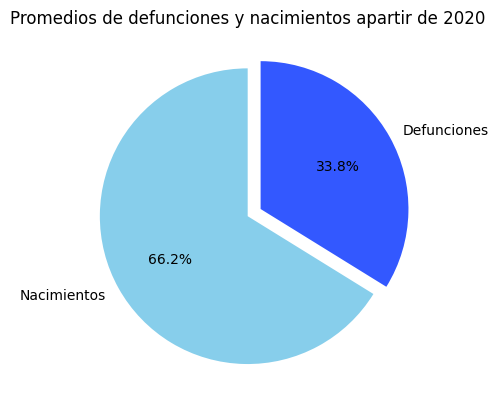

In [23]:
df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()




eje_x = ['Nacimientos','Defunciones'] #Etiquetas
data = [promedio_nacimientos,promedio_defunciones]




color = ['skyblue', '#3358ff']


plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)
plt.title('Promedios de defunciones y nacimientos apartir de 2020')
plt.show()